In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


import wandb
from wandb.sklearn import plot_precision_recall, plot_feature_importances
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc

In [8]:
FULL_DATA_PATH = '../data/diabetic_data_cleaned.csv'

In [9]:
df = pd.read_csv(FULL_DATA_PATH)

In [5]:
le = LabelEncoder()

In [10]:
y = df['readmitted']
X = df.drop('readmitted', axis=1)

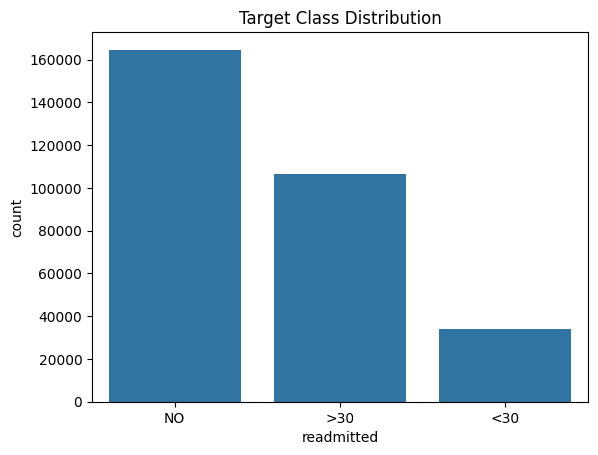

In [6]:
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

In [12]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [13]:
categorical_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [11]:
X.shape

(101766, 44)

In [8]:
df_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [9]:
y_encoded = le.fit_transform(y)

In [10]:
y_encoded

array([2, 2, 2, ..., 2, 2, 2], shape=(305298,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_encoded, test_size=0.2, stratify=y_encoded,random_state=42)

: 

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)